original size: torch.Size([1, 1, 32, 32, 16])
one_hot size: torch.Size([1, 10, 32, 32, 16])


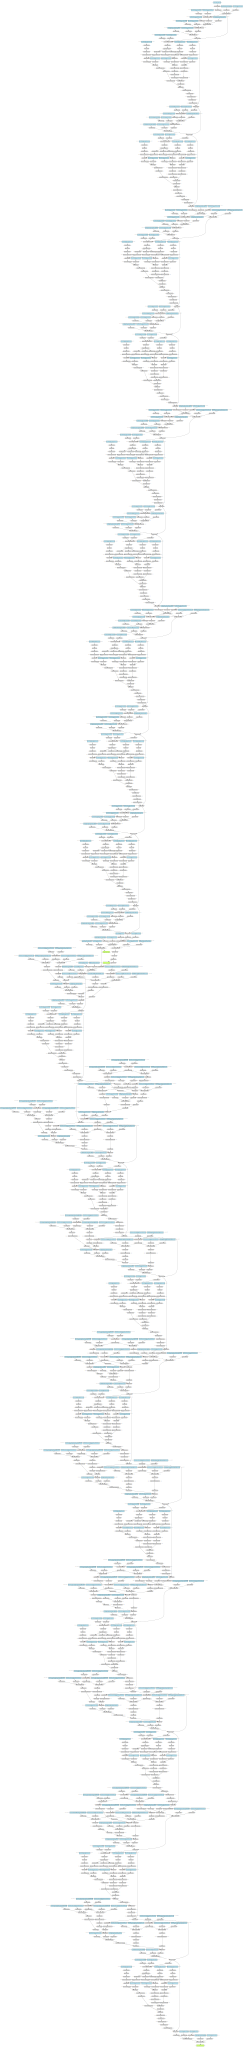

In [2]:
from torchviz import make_dot
import torch
from generative.networks.nets import SPADEDiffusionModelUNet, SPADEAutoencoderKL, PatchDiscriminator
def convert_to_one_hot_3d(x, number_classes):
    if x.dtype != torch.long:
                x = x.long()
    # Create the one-hot encoded tensor.
    b, c, h, w, d = x.size()
    one_hot = torch.zeros(b, number_classes, h, w, d, device=x.device)
    one_hot.scatter_(1, x, 1)
    print("original size:", x.size())
    print("one_hot size:", one_hot.size())
    return one_hot
device = torch.device(f'cuda' if torch.cuda.is_available() else 'cpu')
number_classes = 10
autoencoder = SPADEAutoencoderKL(
            label_nc=10,
            spatial_dims=3,
            in_channels=1,
            out_channels=1,
            num_channels=(8, 16, 32, 64), #(64, 128, 256, 512)
            latent_channels=32, #32
            num_res_blocks=2,
            norm_num_groups=4,
            attention_levels=(2,2,2,2),
        ).to(device)

def model_plot(model_class, input_samples, filename="model_structure.png"):
    clf = model_class
    y = clf(*input_samples) 
    #clf_view = make_dot(y, params=dict(list(clf.named_parameters()) + [('x', input_sample)]))
    clf_view = make_dot(y, params=dict(list(clf.named_parameters()) + [('x', input_samples[0]), ('seg', input_samples[1])]))
    # Save the graph as a PNG file

    #clf_view.format = "png"  # Set output format
    #clf_view.render(filename)  # Saves as filename.png

    #print(f"Model plot saved as {filename}.png")
    return clf_view

x = torch.randn(1, 1, 32, 32, 16).requires_grad_(True).to(device)
seg = torch.randint(0, number_classes-1, (1, 1, 32, 32, 16)).to(device)
seg_one_hot = convert_to_one_hot_3d(seg, number_classes=number_classes)
file_name = r"E:\Projects\yang_proj\SynthRad_GAN\model.png"
model_plot(autoencoder, (x, seg_one_hot), file_name)